In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import random
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
%matplotlib inline

In [12]:
#Function for plotting the images.

def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [2]:
# rotation_range: Int. Degree range for random rotations.
# width_shift_range: Float, 1-D array-like or int(measured as a fraction of the width of the image.)
# height_shift_range: Float, 1-D array-like or int(measured as a fraction of the width of the image.)
# shear_range: Float. Shear Intensity (Shear angle in counter-clockwise direction in degrees)
# zoom_range: Float or [lower, upper]. Range for random zoom. If a float, [lower, upper] = [1-zoom_range, 1+zoom_range].
# channel_shift_range: Float. Range for random channel shifts.
# horizontal_flip: Boolean. Randomly flip inputs horizontally.

gen = ImageDataGenerator(rotation_range=10, width_shift_range=0.1, height_shift_range=0.1, shear_range=0.15, zoom_range=0.1, 
    channel_shift_range=10., horizontal_flip=True)

In [6]:
print(os.getcwd())
chosen_image = random.choice(os.listdir('dogs-vs-cats/train/dog'))

d:\DIC\Deep Learning


In [7]:
image_path = 'dogs-vs-cats/train/dog/' + chosen_image

In [8]:
image = np.expand_dims(plt.imread(image_path),0)

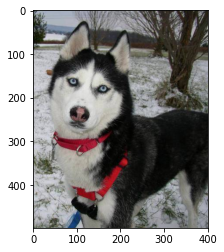

In [9]:
plt.imshow(image[0])

In [10]:
#Next, we'll generate batches of augmented images from the original image.
#The flow() function takes numpy data and generates batches of augmented data.

aug_iter = gen.flow(image)

In [18]:
#Now we'll get ten samples of the augmented images.

aug_images = [next(aug_iter)[0].astype(np.uint8) for i in range(10)]

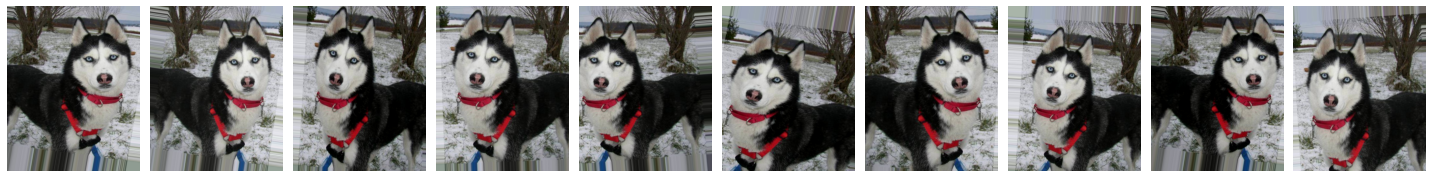

In [19]:
plotImages(aug_images)

In [26]:
aug_iter = gen.flow(image, save_to_dir='dogs-vs-cats/train/dog', save_prefix='aug-image-', save_format='jpeg')